In [ ]:
# Importing Important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
# milk dataset
Data_path= '/content/drive/MyDrive/My_Machine_Learning/datasets/data_temp/milknew.csv'
df = pd.read_csv(Data_path)

In [ ]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df.shape

(1059, 8)

In [ ]:
# checking for null values
df.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [ ]:
# Correcting the column name
df = df.rename(columns={'Temprature': 'Temperature'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


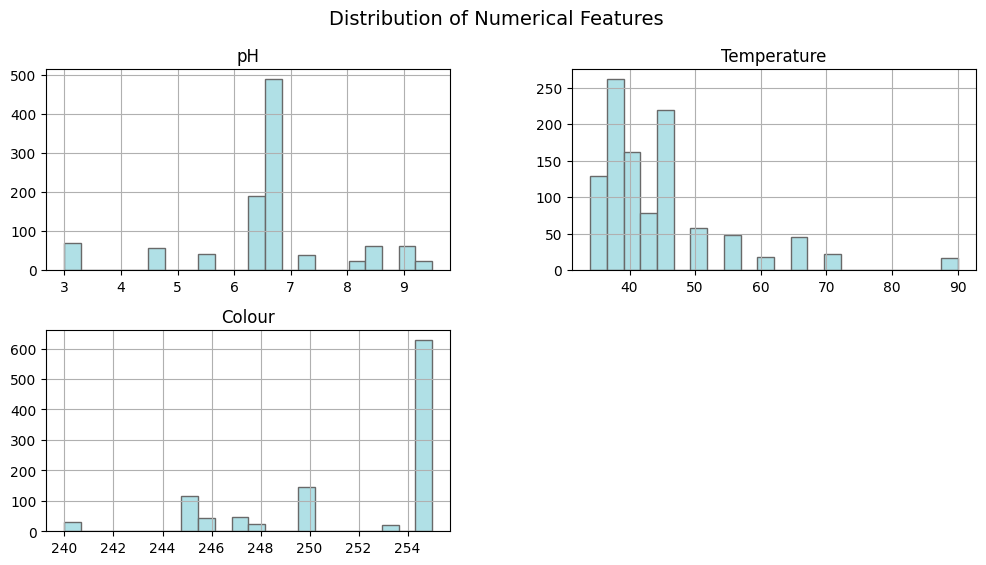

In [ ]:
num_features = ["pH", "Temperature", "Colour"]

df[num_features].hist(bins=22, figsize=(12, 6), color="powderblue", edgecolor="dimgrey")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

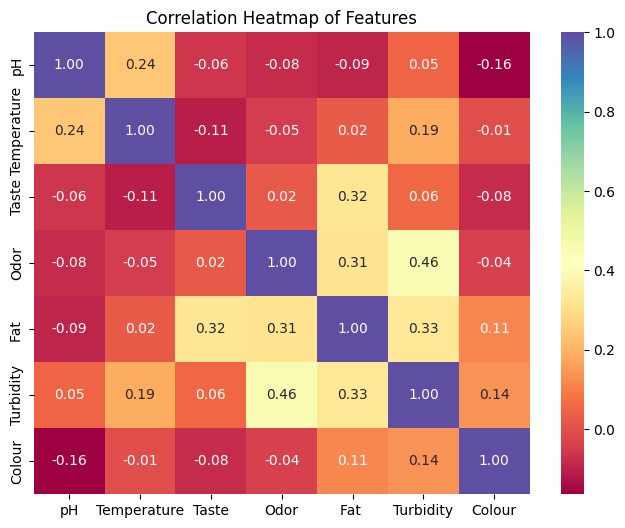

In [ ]:
# plotting Heatmap to observe the relaion between the features
plt.figure(figsize=(8, 6))
corr = df.drop(columns="Grade").corr()
sns.heatmap(corr, annot=True, cmap="Spectral", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

### Prepare the data
First, we need to encode the categorical 'Grade' column into a numerical format. We can use `LabelEncoder` from `sklearn.preprocessing` for this.

In [ ]:
label_encoder = LabelEncoder()
df['Grade_encoded'] = label_encoder.fit_transform(df['Grade'])

display(df[['Grade', 'Grade_encoded']].head())

,Grade,Grade_encoded
0,high,0
1,high,0
2,low,1
3,low,1
4,medium,2


In [ ]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
# split the data into features (X) and target (y), and then split those into training and testing sets.
X = df.drop(['Grade', 'Grade_encoded'], axis=1)
y = df['Grade_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (741, 7)
Testing set shape: (318, 7)


In [ ]:
# Training the modal for Milk.....
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the model
The performance of the trained Random Forest model on the testing data.


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       115
           2       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



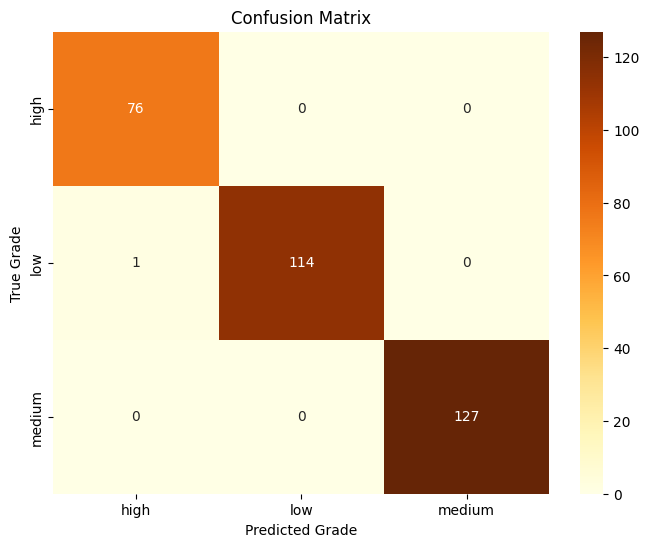

In [ ]:
# confusion matrix for simpler insight
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix')
plt.show()

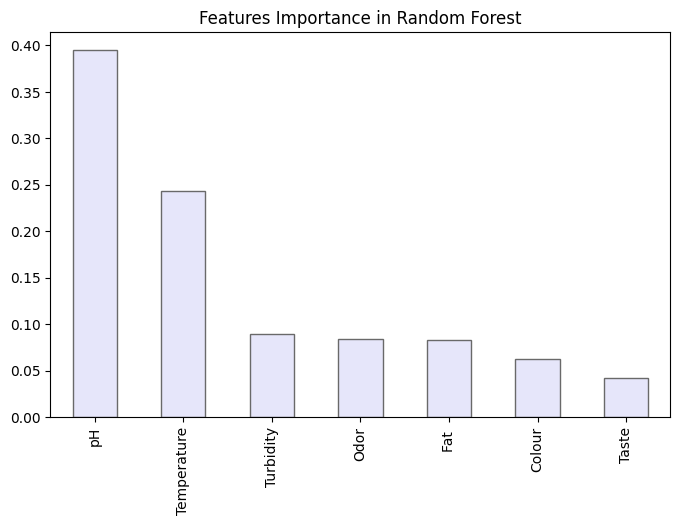

In [ ]:
# Top Features that really halped the modal for training.
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,5), color="lavender", edgecolor = 'dimgrey')
plt.title("Features Importance in Random Forest")
plt.show()

In [ ]:

joblib.dump(model, "milk_quality_rf_model.pkl")
loaded_model = joblib.load("milk_quality_rf_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
label_encoder = joblib.load("label_encoder.pkl")

In [ ]:
# from google.colab import files
# files.download("milk_quality_rf_model.pkl")
#from google.colab import files
#files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>